In [38]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from bs4 import BeautifulSoup
import string
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import numpy as np

In [39]:
print('HE:LLO')

HE:LLO


In [40]:
glove_embeddings = dict()
f = open(r'C:\Users\jleus\PycharmProjects\pythonProject1\Chapter7\glove.twitter.27B.100d.txt', encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    glove_embeddings[word] = coefs
f.close()

In [41]:
glove_embeddings['frog']


array([-2.0432e-01, -2.6150e-01, -1.6633e-01,  4.6853e-01, -4.5815e-01,
        2.7206e-01,  7.2837e-01, -2.7332e-01,  7.1900e-03,  1.3625e-02,
        1.2160e-01,  5.8155e-01, -1.9450e+00,  7.3037e-02,  3.2283e-01,
        7.7129e-01,  4.1995e-01,  3.6865e-01,  1.3315e-01, -5.6905e-01,
        1.2460e-01, -4.2542e-01,  2.1237e-01, -4.0740e-01,  1.2356e+00,
        5.4340e-01, -2.2625e-01,  3.0468e-02, -4.6312e-02,  3.7316e-01,
        5.9658e-01,  2.9139e-01,  5.0718e-01, -2.9507e-01, -8.5241e-01,
        2.3822e-01,  4.6839e-01, -1.8568e-01,  1.7349e-01, -6.8062e-02,
        3.4812e-01, -1.8539e-01, -1.3700e-01,  2.5837e-01,  7.0864e-01,
        8.3642e-01, -2.3989e-02,  9.6164e-01,  4.9107e-01,  1.6798e-01,
        9.6609e-01, -2.8883e-01,  3.8461e-01, -3.8119e-01,  1.5834e-03,
       -1.1867e-01,  2.7806e-01, -1.2263e-01,  9.4348e-02,  4.0990e-01,
       -7.7709e-01, -2.3403e-01,  1.5025e-01, -1.3776e-01, -7.2865e-01,
       -1.2810e-01, -3.3601e-01,  2.8861e-01, -2.6464e-01, -5.68

In [42]:
table = str.maketrans('', '', string.punctuation)

with open(r'C:\Users\jleus\PycharmProjects\pythonProject1\Chapter5\SarcasmDS\sarcasm.json') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [43]:
vocab_size = 13200
embedding_dim = 100
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 23000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [44]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [45]:

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [46]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.85374999  0.22774     0.69474    ... -0.01903     0.16150001
   0.27763   ]
 ...
 [-0.55716002 -0.21588001  0.30399999 ... -0.69821     0.81382
  -0.43865001]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.79688001 -0.94788998 -1.14400005 ...  0.044862    0.14181
   0.46232   ]]


In [47]:
xs=[]
ys=[]
cumulative_x=[]
cumulative_y=[]
total_y=0
for word, index in tokenizer.word_index.items():
    xs.append(index)
    cumulative_x.append(index)
    if glove_embeddings.get(word) is not None:
       total_y = total_y + 1
       ys.append(1)
    else:
        ys.append(0)
    cumulative_y.append(total_y / index)

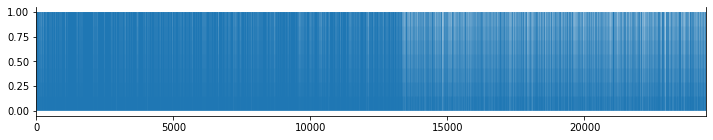

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,2))
ax.spines['top'].set_visible(False)
plt.margins(x=0, y=None, tight=True)
#plt.axis([13000, 14000, 0, 1])
plt.fill(ys)

(0.0, 25000.0, 0.915, 0.985)

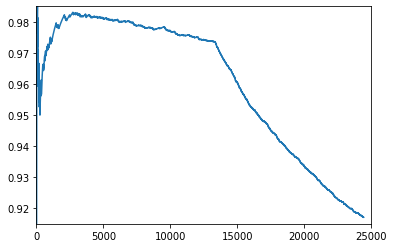

In [49]:
import matplotlib.pyplot as plt
plt.plot(cumulative_x, cumulative_y)
plt.axis([0, 25000, .915, .985])

In [55]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
    weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
    return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999,
amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 100)         1320000   
_________________________________________________________________
bidirectional_14 (Bidirectio (None, None, 200)         160800    
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 200)               240800    
_________________________________________________________________
dense_14 (Dense)             (None, 24)                4824      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 1,726,449
Trainable params: 406,449
Non-trainable params: 1,320,000
_________________________________________________________________


In [58]:
num_epochs = 10
history= model.fit(training_padded, training_labels, epochs=num_epochs,
                   validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
719/719 - 71s - loss: 0.6611 - accuracy: 0.5913 - val_loss: 0.6217 - val_accuracy: 0.6673
Epoch 2/10
719/719 - 62s - loss: 0.5559 - accuracy: 0.7306 - val_loss: 0.5190 - val_accuracy: 0.7520
Epoch 3/10
719/719 - 62s - loss: 0.5018 - accuracy: 0.7626 - val_loss: 0.4920 - val_accuracy: 0.7714
Epoch 4/10
719/719 - 63s - loss: 0.4808 - accuracy: 0.7722 - val_loss: 0.4745 - val_accuracy: 0.7797
Epoch 5/10
719/719 - 63s - loss: 0.4651 - accuracy: 0.7816 - val_loss: 0.4595 - val_accuracy: 0.7910
Epoch 6/10
719/719 - 62s - loss: 0.4530 - accuracy: 0.7874 - val_loss: 0.4492 - val_accuracy: 0.7962
Epoch 7/10
719/719 - 65s - loss: 0.4445 - accuracy: 0.7926 - val_loss: 0.4464 - val_accuracy: 0.7962
Epoch 8/10
719/719 - 63s - loss: 0.4373 - accuracy: 0.7965 - val_loss: 0.4347 - val_accuracy: 0.8053
Epoch 9/10
719/719 - 63s - loss: 0.4310 - accuracy: 0.8000 - val_loss: 0.4315 - val_accuracy: 0.8026
Epoch 10/10
719/719 - 63s - loss: 0.4247 - accuracy: 0.8030 - val_loss: 0.4253 - val_accura

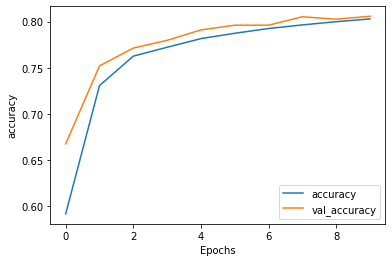

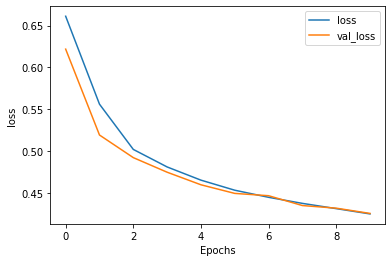

In [59]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [60]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(training_sentences[2])
print(labels[2])

mom starting to fear sons web series closest thing she will have to grandchild ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear sons web series closest thing she will have to grandchild 
1


In [62]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(13200, 100)


In [1]:
test_sentences = ['California Employees Hesitant About Returning To Office Currently On Fire',
                  'Texas Republicans revealed far-reaching voter restriction bills that would overhaul the state’s elections',
                  'Starstruck Man Can’t Think Of Anything To Say To Cruise Ship Hypnotist In Breakfast Buffet Line',
                  'Biden forcefully defends Afghan pullout despite Taliban gains',
                  'Woman Sporting Sandal Tan Must Have Just Returned From Weekend Aboard $35 Million Yacht Off Coast Of Ibiza',
                  'Civil rights leaders dial up pressure on White House to protect voting rights',
                  'The rapid decline of White evangelical America',
                  'Ron DeSantis Requires Florida Residents To Reinforce Bones With Steel, Concrete',
                  'The delta variant threatens to upend the politics of the coronavirus',
                  'Tucker Carlson’s NSA claims are the latest example of the right wing’s rhetorical bait-and-switch',
                  'Parents Just Have 2-Week Hole To Fill In Before Summer Camp Lineup Complete',
                  'Tokyo Olympics To Prevent Covid Spread By Restricting Events To Short Outdoor Walks',
                  ]

print('sup')

sup


In [134]:
sequences = tokenizer.texts_to_sequences(test_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

predictions = model.predict(padded)

In [135]:
print(predictions)


[[0.86263835]
 [0.17121229]
 [0.96226573]
 [0.2724931 ]
 [0.92020524]
 [0.4675371 ]
 [0.24348465]
 [0.6128248 ]
 [0.0324342 ]
 [0.06347814]
 [0.96898323]
 [0.5205938 ]]
